In [81]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import requests 
import random
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 
import datetime as dt # module for manipulating dates and times
import numpy.linalg as lin # module for performing linear algebra operations
import time

from sklearn import metrics
from sklearn import manifold, datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cluster import SpectralClustering 
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import load_digits
from sklearn.datasets.samples_generator import make_blobs
from scipy import ndimage
from itertools import cycle

In [82]:
depWS20_1mW2s_path = 'Time.DepWS20.1mW2s.csv'
depWS20_2mW2S_path = 'Time.DepWS20.2mW2s.csv'
depWS250_uW2s_path = 'Time.DepWS250uW2s.csv'
dfDepWS20_1mW2s = pd.read_csv(depWS20_1mW2s_path)[1:].astype(float)
dfDepWS20_2mW2S = pd.read_csv(depWS20_2mW2S_path)[1:].astype(float)
dfDepWS250_uW2s = pd.read_csv(depWS250_uW2s_path)[1:].astype(float)

In [83]:
print(dfDepWS20_1mW2s.head())
print('-----------------------')
print(dfDepWS20_2mW2S.head())
print('-----------------------')
print(dfDepWS250_uW2s.head())
print('-----------------------')

       xv  T = 2  T = 4  T = 6  T = 8  T = 10  T = 12  T = 14  T = 16  T = 18  \
1  550.07  977.0  975.0  973.0  973.0   975.0   973.0   971.0   972.0   974.0   
2  550.34  975.0  970.0  974.0  973.0   973.0   971.0   973.0   971.0   975.0   
3  550.60  974.0  975.0  972.0  974.0   972.0   973.0   973.0   970.0   975.0   
4  550.86  972.0  972.0  973.0  973.0   973.0   971.0   972.0   970.0   973.0   
5  551.13  975.0  972.0  971.0  974.0   972.0   971.0   974.0   973.0   974.0   

    ...     T = 102  T = 104  T = 106  T = 108  T = 110  T = 112  T = 114  \
1   ...       973.0    971.0    972.0    972.0    972.0    970.0    970.0   
2   ...       973.0    970.0    973.0    971.0    971.0    972.0    972.0   
3   ...       976.0    972.0    972.0    972.0    971.0    974.0    971.0   
4   ...       972.0    972.0    974.0    975.0    972.0    972.0    972.0   
5   ...       974.0    973.0    972.0    970.0    972.0    973.0    972.0   

   T = 116  T = 118  T = 120  
1    974.0    969.0

In [84]:
listOfColumnLabelsForDepWS20_1mW2s = dfDepWS20_1mW2s.columns.tolist
listOfColumnLabelsForDepWS20_1mW2s

<bound method Index.tolist of Index(['xv', 'T = 2', 'T = 4', 'T = 6', 'T = 8', 'T = 10', 'T = 12', 'T = 14',
       'T = 16', 'T = 18', 'T = 20', 'T = 22', 'T = 24', 'T = 26', 'T = 28',
       'T = 30', 'T = 32', 'T = 34', 'T = 36', 'T = 38', 'T = 40', 'T = 42',
       'T = 44', 'T = 46', 'T = 48', 'T = 50', 'T = 52', 'T = 54', 'T = 56',
       'T = 58', 'T = 60', 'T = 62', 'T = 64', 'T = 66', 'T = 68', 'T = 70',
       'T = 72', 'T = 74', 'T = 76', 'T = 78', 'T = 80', 'T = 82', 'T = 84',
       'T = 86', 'T = 88', 'T = 90', 'T = 92', 'T = 94', 'T = 96', 'T = 98',
       'T = 100', 'T = 102', 'T = 104', 'T = 106', 'T = 108', 'T = 110',
       'T = 112', 'T = 114', 'T = 116', 'T = 118', 'T = 120'],
      dtype='object')>

In [85]:
def plotDataFrame(dataframe):
    fig, ax = plt.subplots(figsize=(8,4))
    for column in dataframe:
        if(column != 'xv'):
            color = "#%06x" % random.randint(0, 0xFFFFFF)
            columnLabel = column
            ax.scatter(dfDepWS20_1mW2s.xv.tolist(),
                       dataframe[column].tolist(),
                       c=color,
                       label=columnLabel
                      )
            plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [86]:
def plotLessDataFrame(dataframe, timeFactor):

    sum = 0
    for column in dataframe:
        if(column != 'xv' and sum%timeFactor == 0):
            plotDataFrameAtSpecificTime(dataframe,column)
        sum = sum + 1

In [87]:
def plotDataFrameAtSpecificTime(dataframe,column):
    fig, ax = plt.subplots(figsize=(8,4))
    color = "#%06x" % random.randint(0, 0xFFFFFF)
    columnLabel = column
    ax.scatter(dfDepWS20_1mW2s.xv.tolist(),
               dataframe[column].tolist(),
               c=color,
               label=columnLabel
               )
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

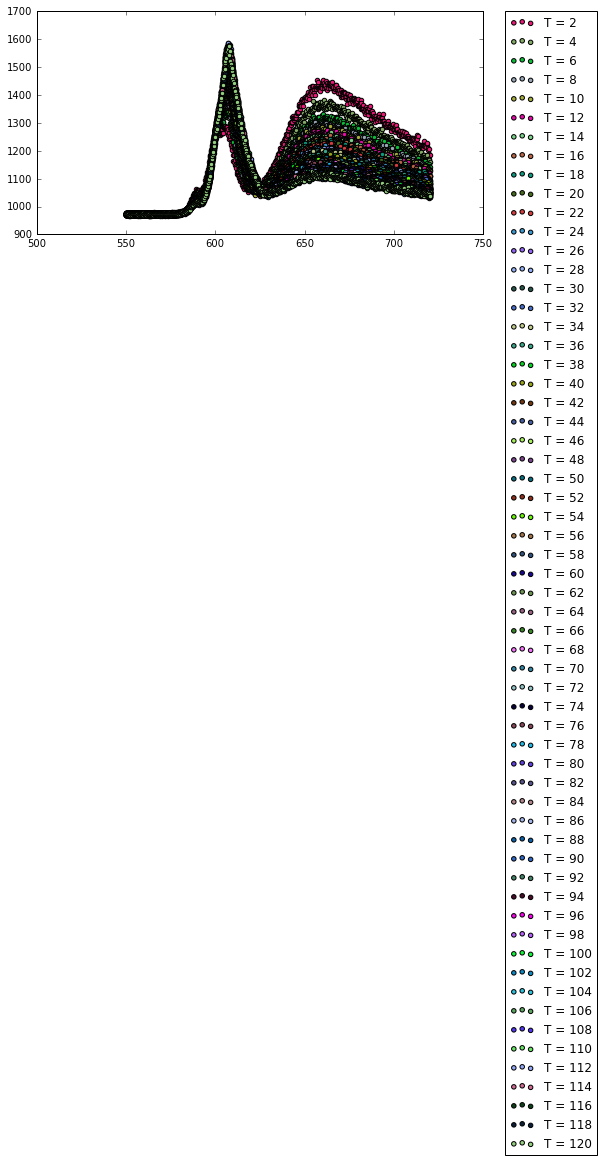

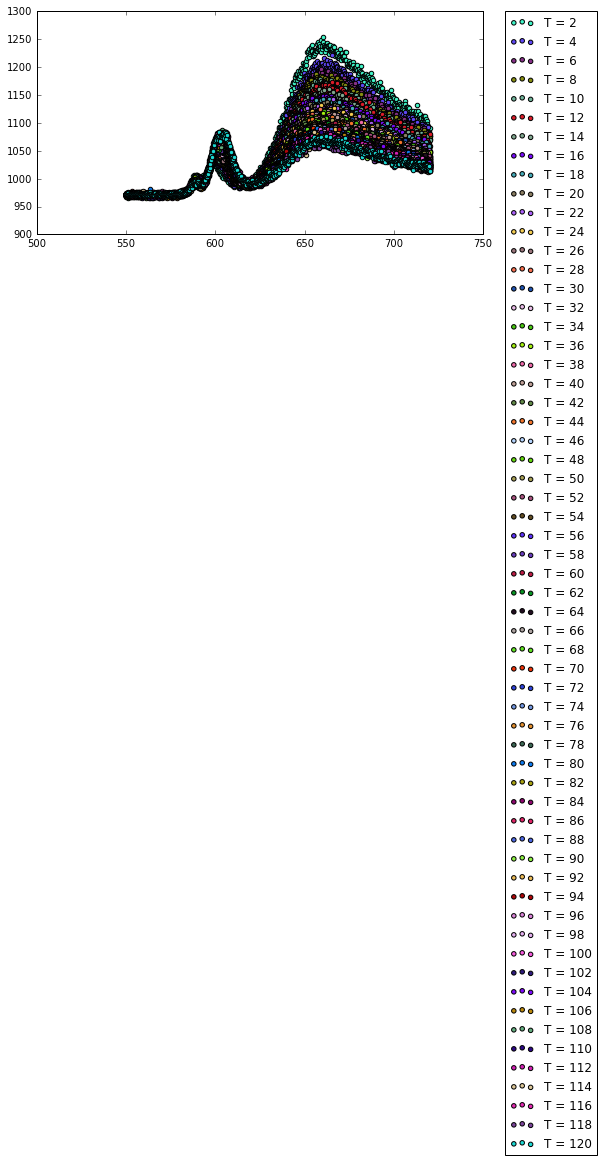

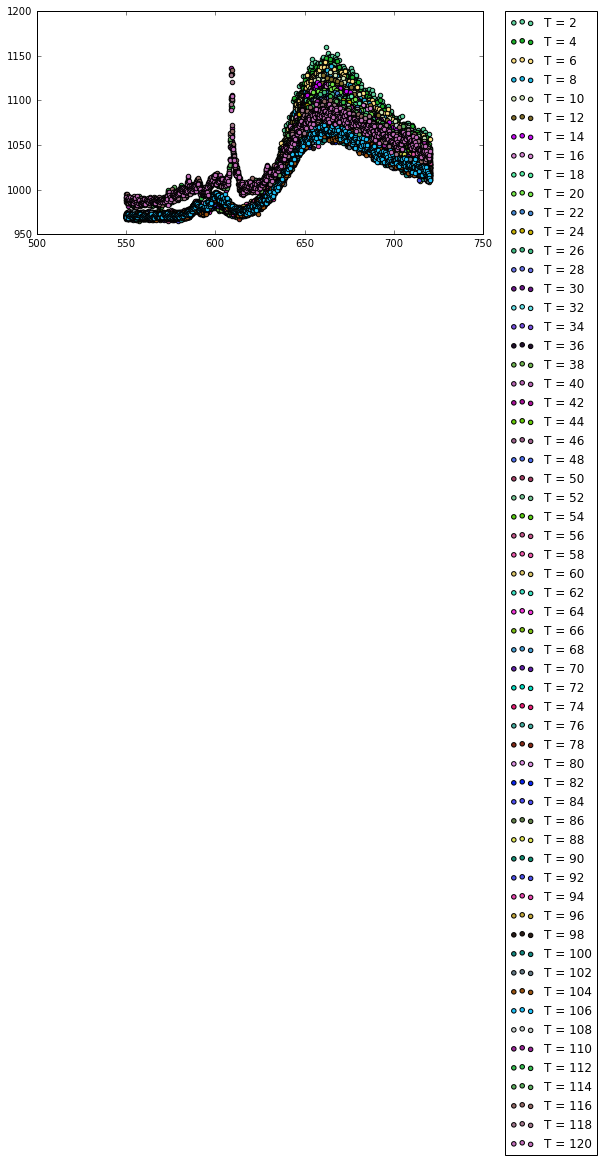

In [88]:
plotDataFrame(dfDepWS20_1mW2s)
plotDataFrame(dfDepWS20_2mW2S)
plotDataFrame(dfDepWS250_uW2s)

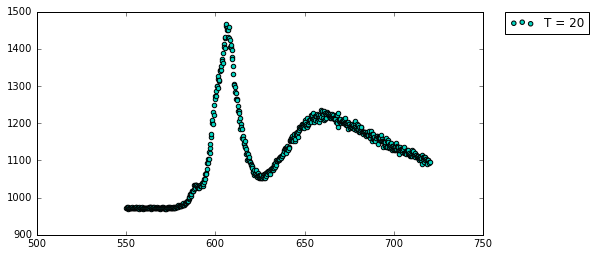

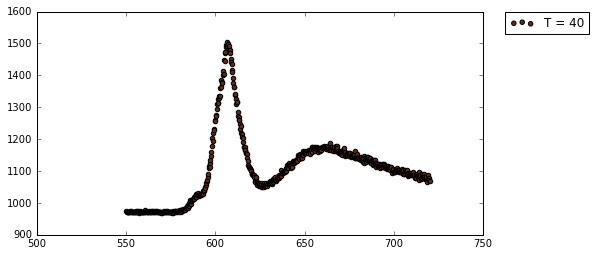

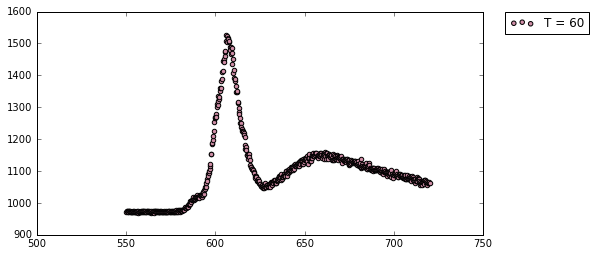

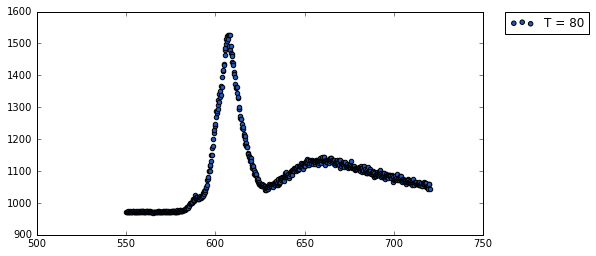

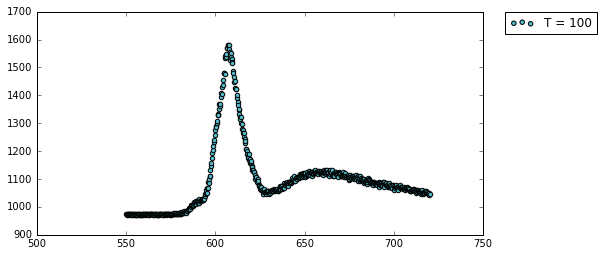

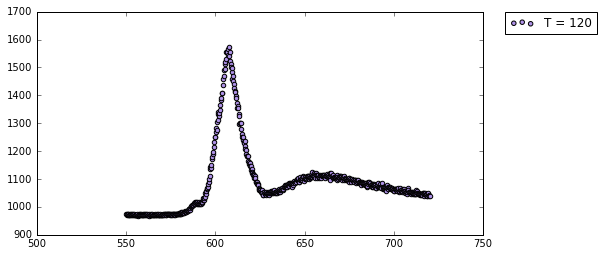

In [89]:
plotLessDataFrame(dfDepWS20_1mW2s,10)

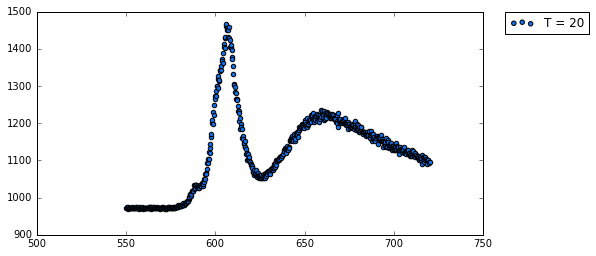

In [90]:
plotDataFrameAtSpecificTime(dfDepWS20_1mW2s,'T = 20')

In [91]:
dfDepWS20_1mW2s

,xv,T = 2,T = 4,T = 6,T = 8,T = 10,T = 12,T = 14,T = 16,T = 18,...,T = 102,T = 104,T = 106,T = 108,T = 110,T = 112,T = 114,T = 116,T = 118,T = 120
1,550.07,977.0,975.0,973.0,973.0,975.0,973.0,971.0,972.0,974.0,...,973.0,971.0,972.0,972.0,972.0,970.0,970.0,974.0,969.0,974.0
2,550.34,975.0,970.0,974.0,973.0,973.0,971.0,973.0,971.0,975.0,...,973.0,970.0,973.0,971.0,971.0,972.0,972.0,977.0,969.0,971.0
3,550.60,974.0,975.0,972.0,974.0,972.0,973.0,973.0,970.0,975.0,...,976.0,972.0,972.0,972.0,971.0,974.0,971.0,972.0,971.0,973.0
4,550.86,972.0,972.0,973.0,973.0,973.0,971.0,972.0,970.0,973.0,...,972.0,972.0,974.0,975.0,972.0,972.0,972.0,973.0,970.0,973.0
5,551.13,975.0,972.0,971.0,974.0,972.0,971.0,974.0,973.0,974.0,...,974.0,973.0,972.0,970.0,972.0,973.0,972.0,974.0,973.0,971.0
6,551.39,974.0,973.0,973.0,973.0,975.0,971.0,969.0,969.0,972.0,...,973.0,973.0,973.0,969.0,974.0,972.0,974.0,973.0,970.0,974.0
7,551.65,976.0,972.0,974.0,973.0,970.0,974.0,973.0,970.0,975.0,...,974.0,973.0,975.0,973.0,970.0,973.0,972.0,975.0,970.0,971.0
8,551.92,974.0,971.0,972.0,974.0,973.0,972.0,970.0,971.0,974.0,...,971.0,974.0,971.0,974.0,974.0,972.0,973.0,972.0,972.0,970.0
9,552.18,975.0,972.0,974.0,974.0,974.0,976.0,973.0,972.0,973.0,...,972.0,974.0,973.0,972.0,971.0,971.0,973.0,975.0,973.0,973.0
10,552.44,975.0,972.0,973.0,974.0,975.0,973.0,972.0,971.0,970.0,...,974.0,973.0,971.0,973.0,970.0,973.0,971.0,974.0,971.0,971.0


In [92]:
def plotRows(dataframe):
    listOfColumns = [2] * 60
    for x in range(1,len(listOfColumns)):
        listOfColumns[x] = listOfColumns[x - 1] + listOfColumns[x]
    fig, ax = plt.subplots(figsize=(8,4))
    for index,row in dataframe.iterrows():
        color = "#%06x" % random.randint(0, 0xFFFFFF)
        columnLabel = dataframe.iloc[index][0]
        ax.scatter(listOfColumns,
                   dataframe.iloc[index][1:].tolist(),
                   c=color,
                   label=columnLabel
                    )
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [93]:
def plotRowsOnSeperateGraphs(dataframe):
    listOfColumns = [1] * 60
    for x in range(1,len(listOfColumns)):
        listOfColumns[x] = listOfColumns[x - 1] + listOfColumns[x]
    for index,row in dataframe.iterrows():
        fig, ax = plt.subplots(figsize=(8,4))
        color = "#%06x" % random.randint(0, 0xFFFFFF)
        columnLabel = dataframe.iloc[index][0]
        ax.scatter(listOfColumns,
                   dataframe.iloc[index][1:].tolist(),
                   c=color,
                    label=columnLabel
                   )
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [94]:
# plotRows(dfDepWS20_1mW2s)

In [95]:
# plotRowsOnSeperateGraphs(dfDepWS20_1mW2s)

In [96]:
def plotPrincipalComponentsOfDataFrame(dataframe):
    npDataframe = dataframe[1:].astype(float).as_matrix()
    U, s, V = np.linalg.svd(npDataframe)
    principalComponents = np.arange(1, len(s) + 1)
    plt.plot(principalComponents[:10], s[:10], linewidth=2.0)
    plt.title('Dataframe principal components')
    plt.xlabel('Principal Component')
    plt.ylabel('EigenValue')

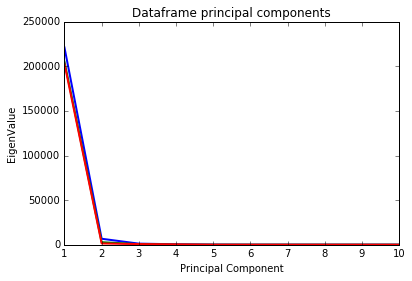

In [97]:
plotPrincipalComponentsOfDataFrame(dfDepWS20_1mW2s)
plotPrincipalComponentsOfDataFrame(dfDepWS20_2mW2S)
plotPrincipalComponentsOfDataFrame(dfDepWS250_uW2s)

In [98]:
def reduceDataFrame(dataframe):
    return PCA(n_components=2).fit_transform(dataframe[1:].astype(float))

In [99]:
data = scale(dfDepWS20_1mW2s)
n_samples, n_features = data.shape
print("n_samples %d, \t n_features %d"
      % (n_samples, n_features))


n_samples 654, 	 n_features 61


In [101]:
def kMeansClustering(matrix):
    kmeans = KMeans(init='k-means++', n_clusters=5, n_init=1)
    kmeans.fit(matrix)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = 10     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = matrix[:, 0].min() - 1, matrix[:, 0].max() + 1
    y_min, y_max = matrix[:, 1].min() - 1, matrix[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(matrix[:, 0], matrix[:, 1], 'k.', markersize=2)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('K-means clustering on the dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

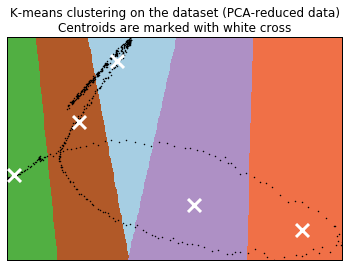

In [102]:
kMeansClustering(reduceDataFrame(dfDepWS20_1mW2s))

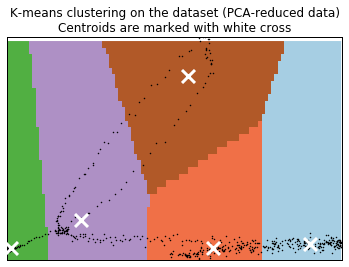

In [103]:
kMeansClustering(reduceDataFrame(dfDepWS20_2mW2S))

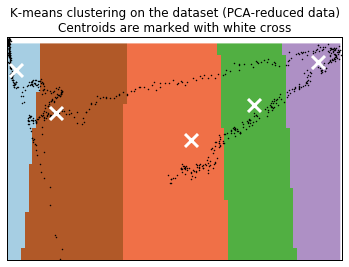

In [104]:
kMeansClustering(reduceDataFrame(dfDepWS250_uW2s))

In [105]:
def affinityPropagation(matrix):
    af = AffinityPropagation(preference=-50).fit(matrix)
    cluster_centers_indices = af.cluster_centers_indices_
    labels = af.labels_

    n_clusters_ = len(cluster_centers_indices)


    plt.close('all')
    plt.figure(1)
    plt.clf()

    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clusters_), colors):
        class_members = labels == k
        cluster_center = matrix[cluster_centers_indices[k]]
        plt.plot(matrix[class_members, 0], matrix[class_members, 1], col + '.')
        plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=14)
        for x in matrix[class_members]:
            plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()

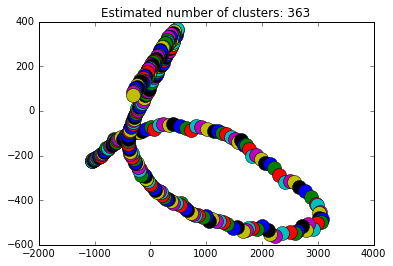

In [106]:
affinityPropagation(reduceDataFrame(dfDepWS20_1mW2s))

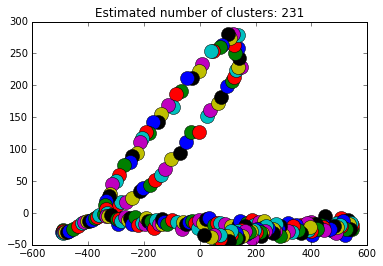

In [107]:
affinityPropagation(reduceDataFrame(dfDepWS20_2mW2S))

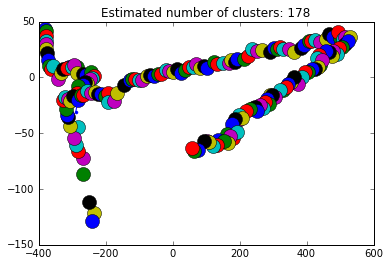

In [108]:
affinityPropagation(reduceDataFrame(dfDepWS250_uW2s))

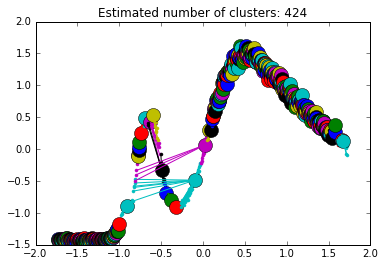

In [109]:
affinityPropagation(scale(dfDepWS20_1mW2s))

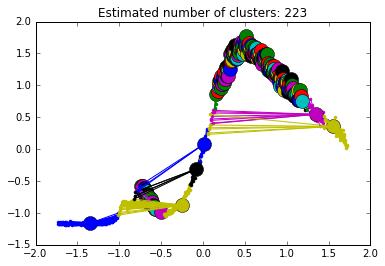

In [110]:
affinityPropagation(scale(dfDepWS20_2mW2S))

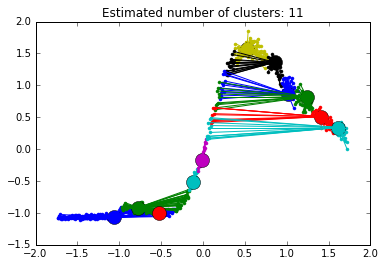

In [111]:
affinityPropagation(scale(dfDepWS250_uW2s))

In [112]:
def meanShift(matrix):
    bandwidth = estimate_bandwidth(matrix, quantile=0.2, n_samples=654)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(matrix)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)

    plt.figure(1)
    plt.clf()

    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clusters_), colors):
        my_members = labels == k
        cluster_center = cluster_centers[k]
        plt.plot(matrix[my_members, 0], matrix[my_members, 1], col + '.')
        plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=14)
    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()

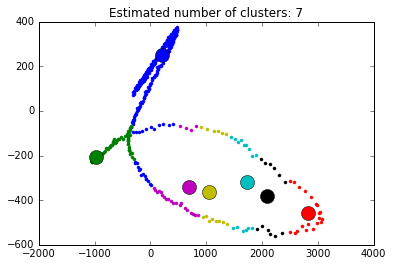

In [113]:
meanShift(reduceDataFrame(dfDepWS20_1mW2s))

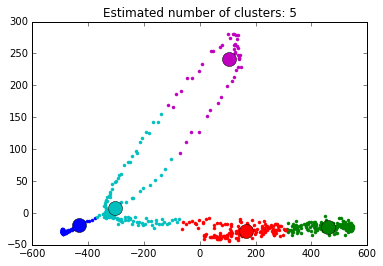

In [114]:
meanShift(reduceDataFrame(dfDepWS20_2mW2S))

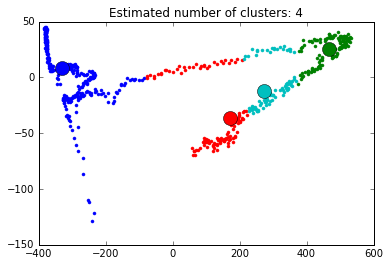

In [115]:
meanShift(reduceDataFrame(dfDepWS250_uW2s))

In [116]:
def kNearestNeighbor(matrix):
    knn_graph = kneighbors_graph(matrix, 6, include_self=False)

    for connectivity in (None, knn_graph):
        for n_clusters in (30, 3):
            plt.figure(figsize=(10, 4))
            for index, linkage in enumerate(('average', 'complete', 'ward')):
                plt.subplot(1, 3, index + 1)
                model = AgglomerativeClustering(linkage=linkage,
                                                connectivity=connectivity,
                                                n_clusters=6)
                t0 = time.time()
                model.fit(matrix)
                elapsed_time = time.time() - t0
                plt.scatter(matrix[:, 0], matrix[:, 1], c=model.labels_,
                            cmap=plt.cm.spectral)
                plt.title('linkage=%s (time %.2fs)' % (linkage, elapsed_time),
                          fontdict=dict(verticalalignment='top'))
                plt.axis('equal')
                plt.axis('off')

                plt.subplots_adjust(bottom=0, top=.89, wspace=0,
                                left=0, right=1)
                plt.suptitle('n_cluster=%i, connectivity=%r' %
                         (n_clusters, connectivity is not None), size=17)


    plt.show()

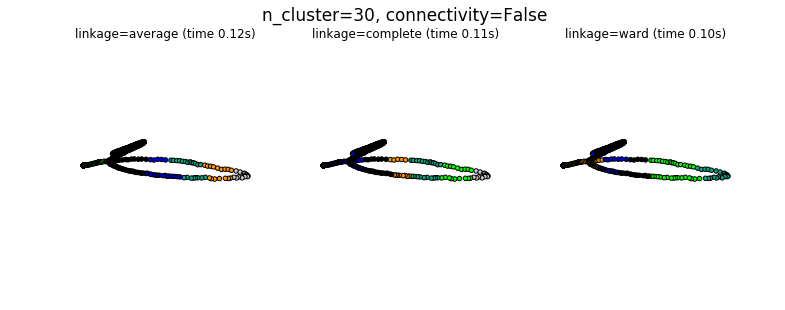

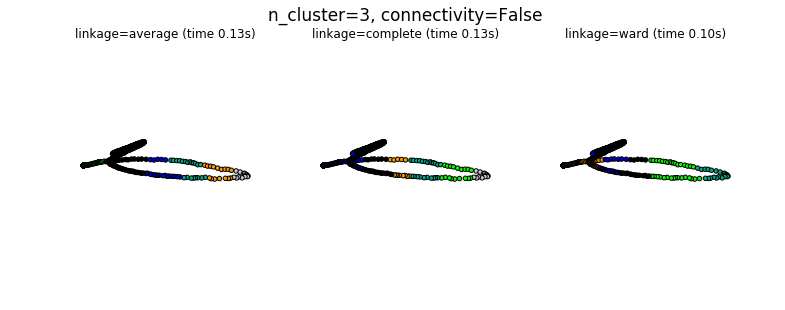

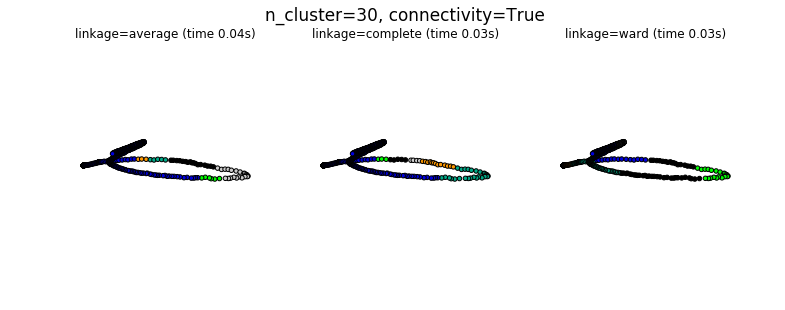

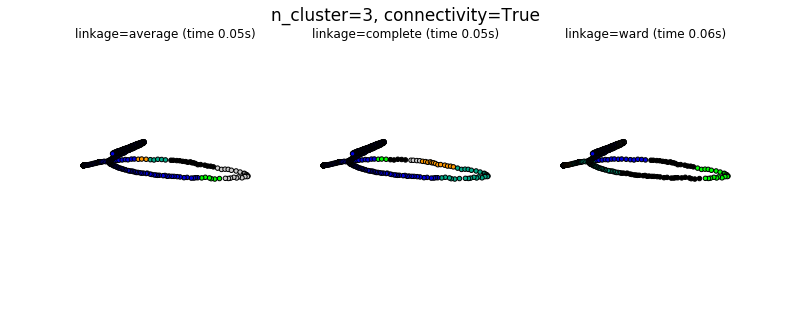

In [117]:
kNearestNeighbor(reduceDataFrame(dfDepWS20_1mW2s))

/Users/andresarango/anaconda/lib/python3.5/site-packages/sklearn/cluster/hierarchical.py:443: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)
/Users/andresarango/anaconda/lib/python3.5/site-packages/sklearn/cluster/hierarchical.py:207: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)


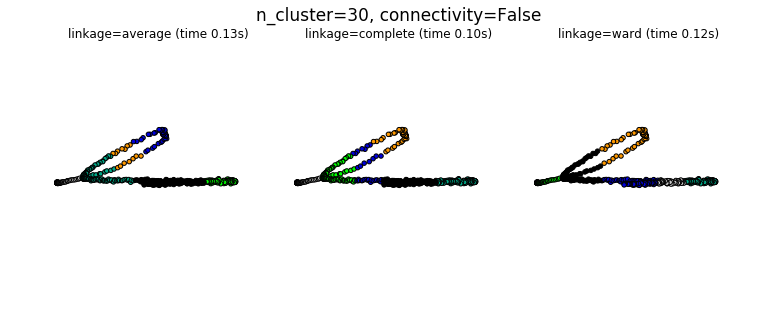

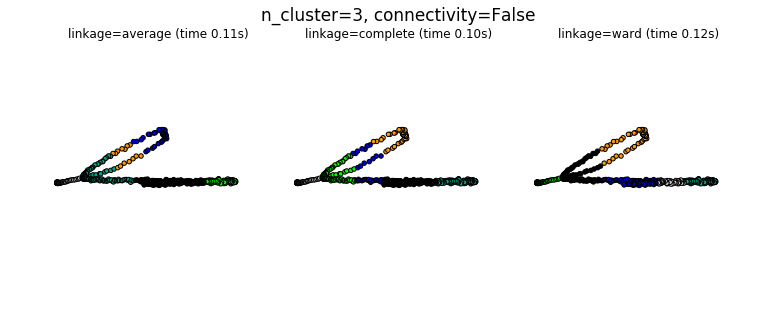

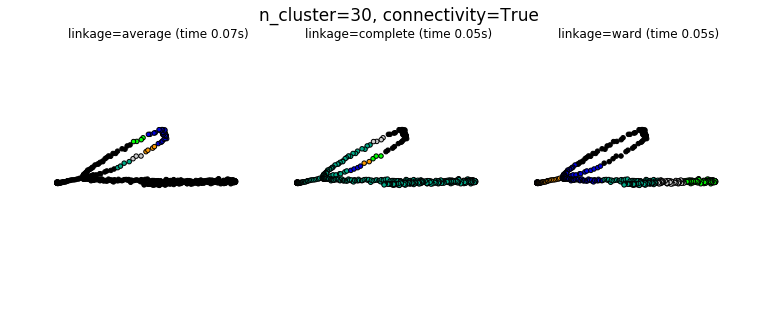

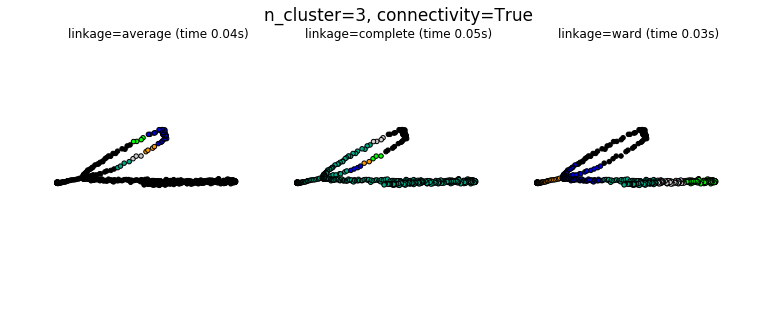

In [118]:
kNearestNeighbor(reduceDataFrame(dfDepWS20_2mW2S))

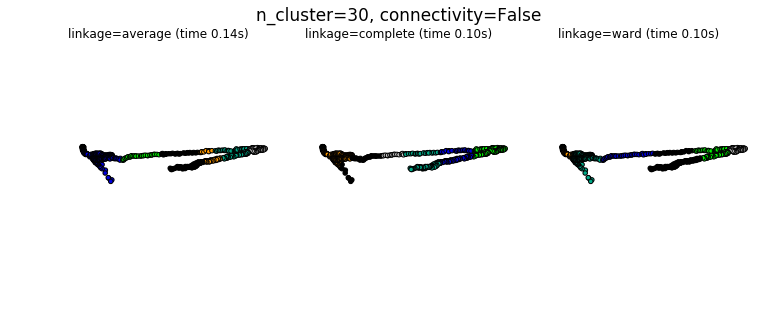

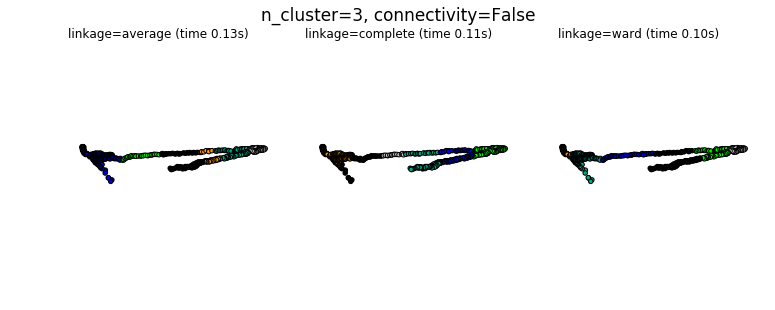

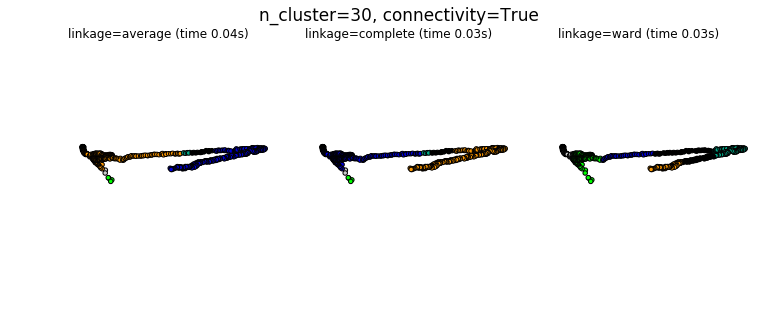

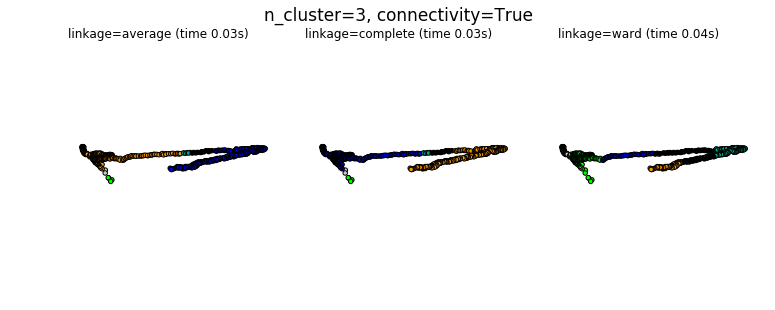

In [119]:
kNearestNeighbor(reduceDataFrame(dfDepWS250_uW2s))

In [121]:
def spectralClustering(matrix):
    spectral = SpectralClustering(n_clusters=5,
                                          eigen_solver='arpack',
                                          affinity="nearest_neighbors")
    t0 = time.time()
    spectral.fit(matrix)
    t1 = time.time()
    plt.title('Spectral', size=18)
    plt.scatter(matrix[:, 0], matrix[:, 1], s=10)

    if hasattr(spectral, 'cluster_centers_'):
        centers = spectral.cluster_centers_
        center_colors = colors[:len(centers)]
        plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
        transform=plt.gca().transAxes, size=15,
        horizontalalignment='right')
        plot_num += 1

    plt.show()

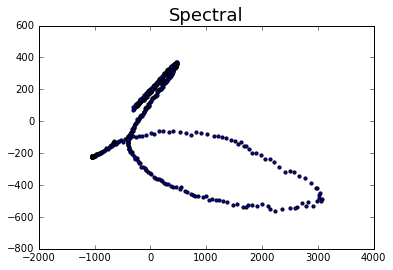

In [122]:
spectralClustering(reduceDataFrame(dfDepWS20_1mW2s))

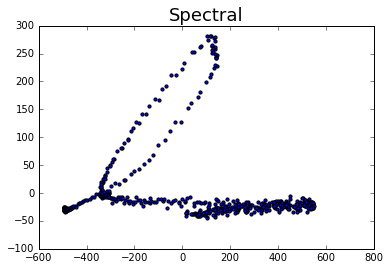

In [123]:
spectralClustering(reduceDataFrame(dfDepWS20_2mW2S))

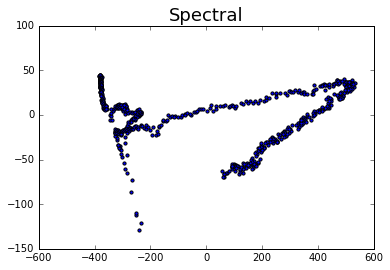

In [124]:
spectralClustering(reduceDataFrame(dfDepWS250_uW2s))